In [23]:
import pandas as pd
import numpy as np
df = pd.read_csv('F:/ICT2023/AI-LAB/data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [24]:
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,male,27.0,0,0,13.00,S
887,888,1,1,female,19.0,0,0,30.00,S
888,889,0,3,female,NaN,1,2,23.45,S
889,890,1,1,male,26.0,0,0,30.00,C
890,891,0,3,male,32.0,0,0,7.75,Q


In [25]:
for x in df.columns:
    qssl = df[x].isnull().sum()#缺失值数量
    qszb = df[x].isnull().sum()/df.shape[0]*100
    print(x,'缺失值数量：',qssl,'缺失值占比：',qszb,'%')

PassengerId 缺失值数量： 0 缺失值占比： 0.0 %
Survived 缺失值数量： 0 缺失值占比： 0.0 %
Pclass 缺失值数量： 0 缺失值占比： 0.0 %
Sex 缺失值数量： 0 缺失值占比： 0.0 %
Age 缺失值数量： 177 缺失值占比： 19.865319865319865 %
SibSp 缺失值数量： 0 缺失值占比： 0.0 %
Parch 缺失值数量： 0 缺失值占比： 0.0 %
Fare 缺失值数量： 0 缺失值占比： 0.0 %
Embarked 缺失值数量： 2 缺失值占比： 0.22446689113355783 %


In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [28]:
# 获取数值特征统计信息
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.412921,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.501196,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,2.000000,3.000000,80.000000,5.000000,6.000000,512.329200


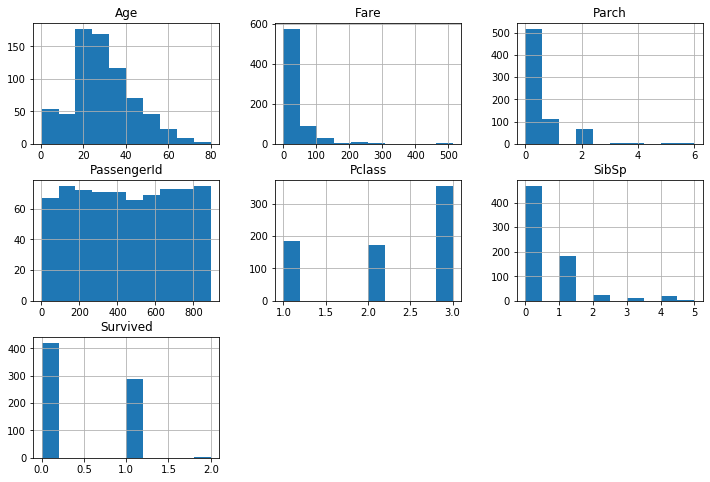

In [29]:
# 绘制数据集中所有数值型特征的直方图
import matplotlib.pyplot as plt
df.hist(figsize=(12,8))
plt.show()

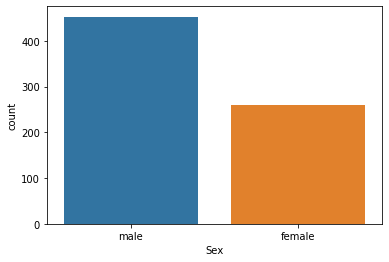

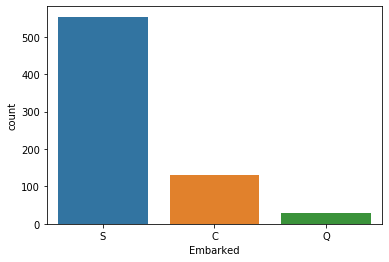

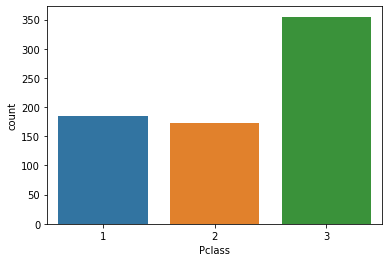

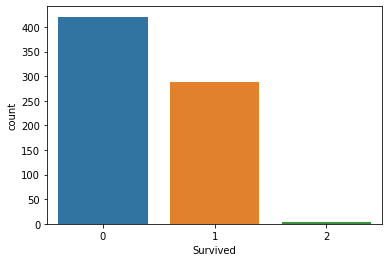

In [30]:
# 绘制数据集中所有分类型特征的条形图
import seaborn as sn
x = ['Sex','Embarked','Pclass','Survived']
for f in x:
    sn.countplot(x=f,data=df)
    plt.show()

In [31]:
# 使用pandas的corr()方法计算数据集中数值型特征之间的相关系数矩阵
df_corr = df.corr()
df_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.010865,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.010865,1.000000,-0.347435,-0.079214,-0.000390,0.091397,0.262395
Pclass,-0.035609,-0.347435,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.079214,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.000390,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.091397,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.262395,-0.552893,0.093143,0.139860,0.206624,1.000000


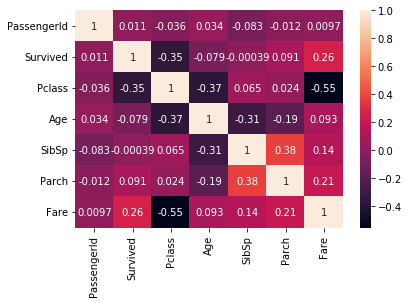

In [34]:
# 绘制相关系数矩阵的热力图
import seaborn as sn
sn.heatmap(df_corr,annot=True)

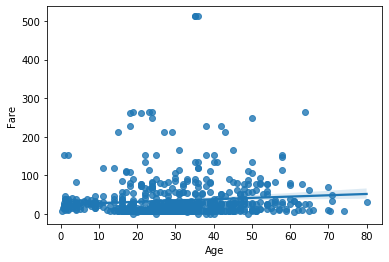

In [36]:
# 选择两个数值型特征绘制散点图，并添加趋势线
sn.regplot(x='Age',y='Fare',data=df)
plt.show()

In [17]:
# 对所有分类型特征进行独热编码
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['Sex','Embarked','Pclass']
encoder = OneHotEncoder()
encoder_features = encoder.fit_transform(df[categorical_features]).toarray()
encoder_features_df = pd.DataFrame(encoder_features, columns=encoder.get_feature_names())
df.drop(categorical_features, axis=1, inplace=True)
data = pd.concat([df, encoder_features_df], axis=1)
data.dropna(inplace=True)


In [18]:
df_one = pd.get_dummies(df)#对数据集做独热编码

In [20]:
# 将数据集划分为训练集和测试集，比例为3:1，使用随机种子为42
x=[col for col in df_one.columns if col!='Survived']
X = df[x]
Y=df_one['Survived']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [29]:
# 使用线性回归模型对数据集进行拟合，计算模型的R方值
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,f1_score
lr = LinearRegression()# 建模
lr.fit(x_train, y_train)# 使用模型训练数据
y_pred = lr.predict(x_test)# 对模型进行预测
r2 = r2_score(y_test, y_pred)# 模型评估
print('线性回归模型的R方值：',r2)

线性回归模型的R方值： 0.014575516560332402


In [30]:
# 使用逻辑回归对数据集进行拟合，计算模型的准确率
logistic_regression = LogisticRegression()#建模
logistic_regression.fit(x_train,y_train)#进行模型训练
y_pred = logistic_regression.predict(x_test)#预测
accuracy = accuracy_score(y_test,y_pred)#模型评分
print('逻辑回归模型的准确率：',accuracy)

逻辑回归模型的准确率： 0.6588785046728972


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
# 使用随机森林模型对数据集进行拟合，计算模型的准确率
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('随机森林模型的准确率：',accuracy)

随机森林模型的准确率： 0.6822429906542056


In [32]:
# 使用accuracy_score进行评估
from sklearn.metrics import accuracy_score,f1_score
print('逻辑回归模型的准确率(使用accuracy_score进行评估)：',accuracy_score(y_test,y_pred))

逻辑回归模型的准确率(使用accuracy_score进行评估)： 0.6822429906542056


In [33]:
# 使用网格搜索对随机森林模型进行调参，选择最优参数，过采样（SMOTE）
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[10,20,30,40],'max_depth':[3,4,5,6]}
grid_search = GridSearchCV(random_forest,param_grid=param_grid,cv=10)
grid_search.fit(x_train,y_train)
print('最优参数：',grid_search.best_params_)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


最优参数： {'max_depth': 5, 'n_estimators': 30}


In [34]:
# 使用最优参数重新训练随机森林模型，并计算模型的准确率
random_forest = grid_search.best_estimator_
random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('优化后的随机森林模型的准确率：',accuracy)

优化后的随机森林模型的准确率： 0.6401869158878505


In [35]:
# 对调优后的模型使用f1值评估
print('优化后的随机森林模型的f1值：',f1_score(y_test,y_pred,average='micro'))

优化后的随机森林模型的f1值： 0.6401869158878505
